In [1]:
!pip install librosa numpy pandas matplotlib scikit-learn

  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ------------------- ------------------- 51.2/104.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  102.4/104.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.2 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl.metadata (36 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/260.7 kB ? eta -:--:--
   -------------- ------------------------- 92.2/260.7 kB 5.5 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/260.7 kB 5.5 MB/s eta 0:00:01
   ---------------------------------- 

Extract Features from Audio Files

In [2]:
import librosa
import numpy as np
import pandas as pd
import os

folder = 'songs/'
features = []
filenames = []

for file in os.listdir(folder):
    if file.endswith('.mp3'):
        path = os.path.join(folder, file)

        try:
            y, sr = librosa.load(path,  duration=30)
            mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
            chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
            contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
            feature_vector = np.concatenate([mfcc, chroma, contrast])
            features.append(feature_vector)
            filenames.append(file)
        
        except Exception as e:
            print(f'Failed to process {file}: {e}')


df = pd.DataFrame(features)
df['filename'] = filenames




In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,filename
0,-221.801956,75.791832,15.572335,26.797096,5.802037,-3.325009,5.133283,7.383546,2.778337,-0.278669,...,0.311966,0.349227,16.619996,13.533619,20.736856,22.167545,19.316677,19.224676,46.292227,@ARRahman - Barso Re Guru Aishwarya Rai Bac...
1,-161.564575,82.576698,12.960377,38.740730,6.096324,5.685710,7.472650,10.152605,-14.010978,18.739437,...,0.463600,0.437966,20.893365,17.958008,20.344843,18.842149,19.714283,20.722507,48.484651,A.R. Rahman - Tere Bina Best Video GuruAishwar...
2,-1.787840,104.916893,-26.389462,14.907591,-7.420176,0.840097,4.993746,-0.020406,0.661486,6.264137,...,0.563476,0.299172,15.935915,14.950504,17.631205,17.515194,18.594853,21.295657,49.337076,David Guetta & Bebe Rexha - I'm Good (Blue) [L...
3,-274.414459,103.225731,9.480748,42.682217,7.004724,19.015791,11.026879,9.440333,6.592296,7.415268,...,0.661451,0.615889,14.061121,11.554364,13.082494,14.790149,15.571173,19.722885,47.408957,Dhruva Natchathiram - Oru Manam Video Chiyaan...
4,-222.543411,112.682503,4.578103,13.235240,4.172538,-12.847507,-4.613918,-20.819258,-17.347046,-5.477718,...,0.381081,0.185023,24.558425,19.974520,22.350286,20.299889,19.977479,21.751578,46.607925,Doobey - Official Video Gehraiyaan Deepika P...
5,-205.429520,106.923546,-65.686287,24.047455,-6.081092,16.006958,8.168983,25.371565,7.140123,18.116314,...,0.271805,0.351002,23.405041,18.246959,21.232263,20.890575,20.917618,20.503608,55.275822,Eagles - Hotel California Lyrics.mp3
6,1.634351,53.435062,-2.909941,20.709221,1.242517,6.891966,-0.436646,4.545318,-1.411039,5.232694,...,0.526386,0.474499,21.320220,14.048982,17.370835,17.251724,16.947550,16.395174,46.474380,Enrique Iglesias - I Like It (Official Music V...
7,-63.714760,51.001766,3.992866,24.595882,3.612014,12.250174,0.853148,9.320642,-3.102773,7.124567,...,0.606613,0.438003,22.081664,15.974108,17.903085,17.504733,17.648237,17.067859,47.958869,Enrique Iglesias - Physical (feat. Jennifer Lo...
8,-234.408356,62.809513,-23.345139,-6.114535,-18.937258,15.471142,1.154090,-11.611732,-13.138681,-2.870760,...,0.062240,0.131977,23.529996,17.331233,22.901328,26.355350,23.929772,18.850022,44.367000,Girls Like You - Indian Classical Version (fea...
9,-156.018265,108.407608,1.376814,20.582823,-3.204326,-14.238330,-6.160606,-2.947766,-7.395887,-5.932398,...,0.336730,0.401641,22.478804,17.350432,19.733869,20.364874,20.057934,22.276537,47.806844,Lamberghini One Take Tejas Dhoke Choreography ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         25 non-null     float64
 1   1         25 non-null     float64
 2   2         25 non-null     float64
 3   3         25 non-null     float64
 4   4         25 non-null     float64
 5   5         25 non-null     float64
 6   6         25 non-null     float64
 7   7         25 non-null     float64
 8   8         25 non-null     float64
 9   9         25 non-null     float64
 10  10        25 non-null     float64
 11  11        25 non-null     float64
 12  12        25 non-null     float64
 13  13        25 non-null     float64
 14  14        25 non-null     float64
 15  15        25 non-null     float64
 16  16        25 non-null     float64
 17  17        25 non-null     float64
 18  18        25 non-null     float64
 19  19        25 non-null     float64
 20  20        25 non-null     float64


Normalize & Reduce Dimensions with PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [7]:
X = df.drop('filename', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [8]:
X_scaled

array([[-9.49076470e-02, -9.93516039e-01,  7.63151884e-01,
         2.54377231e-01,  1.49717510e-01, -8.90395326e-01,
         8.16632439e-01,  5.58859311e-01,  1.07231542e+00,
        -2.66212782e-01, -1.73775803e+00, -1.32115425e+00,
        -1.47387610e+00, -5.21428508e-01, -7.63909507e-01,
        -9.92147362e-01, -7.65912784e-01, -8.22551027e-01,
        -8.80805850e-01, -8.68735161e-01, -2.72769939e-01,
         5.12896647e-01,  1.54937345e+00, -1.62151565e-01,
         8.14192657e-02, -1.44804281e+00, -1.37699797e+00,
        -7.80197531e-02,  5.15095600e-01, -3.48364600e-01,
        -5.32806122e-01, -7.25742623e-01],
       [ 4.42141159e-01, -7.88344671e-01,  6.43872654e-01,
         1.13015875e+00,  1.78761014e-01, -1.43909581e-02,
         1.16840920e+00,  8.53994568e-01, -1.13454622e+00,
         2.23864180e+00,  6.45914022e-01,  1.22713925e+00,
         7.72120177e-01,  8.09708935e-02,  8.65304593e-01,
        -7.52133029e-01, -5.93890719e-01,  9.22786408e-01,
        -1.80

In [9]:
X_pca

array([[ 0.34651246, -2.69720674],
       [-1.89045487,  1.11893681],
       [-1.9274621 ,  0.85347238],
       [-8.75467565,  0.01159507],
       [ 2.97878191, -3.17277536],
       [-0.99321978,  4.45731215],
       [-4.49504785, -0.62137735],
       [-4.67054639, -0.14756496],
       [ 4.10187665,  0.14376361],
       [ 1.16258776, -2.07930047],
       [ 3.63166846, -1.47480603],
       [ 1.34384982,  0.23008097],
       [-0.29715573, -1.20348652],
       [ 1.11686501,  2.31578602],
       [ 3.1014573 ,  6.54780128],
       [ 4.39992842,  0.2788896 ],
       [ 1.94297483,  0.93514902],
       [ 0.80510451,  0.20062239],
       [ 3.54858169, -0.42046434],
       [-1.16465639, -0.68491999],
       [-7.22482576, -0.34685911],
       [ 0.28026926, -0.24048615],
       [ 2.5587942 , -1.88859929],
       [-2.16998914, -0.78792078],
       [ 2.26878139, -1.32764221]])

Cluster Songs with K-Means

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)



 Visualize the Clusters

Matplotlib is building the font cache; this may take a moment.


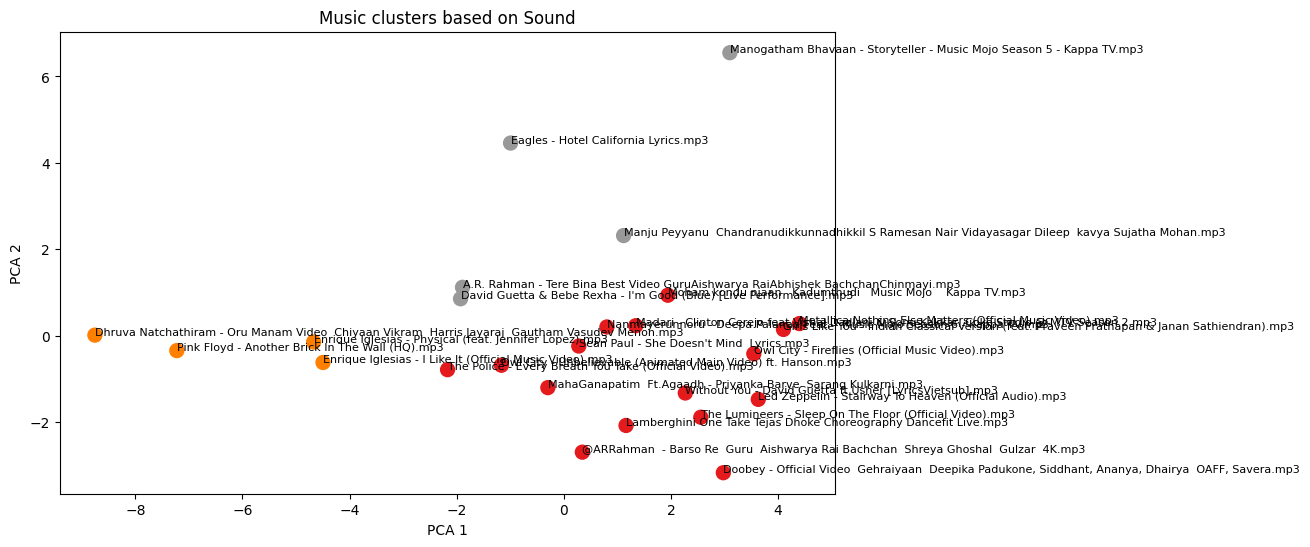

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[: , 0], X_pca[: , 1], c=labels, cmap='Set1',s=100)
plt.title('Music clusters based on Sound')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


for i, txt in enumerate(df['filename']):
    plt.annotate(txt, (X_pca[i,0], X_pca[i,1]) , fontsize=8)

plt.show()    

Lets see if we can make the chart more interactive?

Had to write code in a .py file because .ipynb doesnt support interactive plotting diagrams via jupyternotebooks.

(find the code in filename: Project14-associated-script1.py )

Lets view what we have figured out from the ML model as a gif file shall we?

#####  Successful!

We have found out patterns from our list of  raw mp3 files. And we have clustered them according to the audio music into a 2 dimensional chart. Where songs most similiar to each other are plotted close to each other.

Below is a short gif screengrab of the interactive cluster visualization we created using Plotly.  

Each point represents a song, and hovering shows its filename.



![Music Clustering gif output](screengrab-gif-format.gif)

